
🔍 Dataset Loaded:
                                         Instruction  \
0  သစ်ပင်စိုက်ပျိုးရန် အကောင်းဆုံးအချိန်က ဘယ်အချိ...   
1      သစ်ပင်စိုက်ပျိုးရန် မြေကို ဘယ်လိုပြင်ဆင်ရမလဲ?   
2  မျိုးစေ့နှင့် seedling တို့အကြား ဘာကွာခြားမှုရ...   
3        သစ်ပင်စိုက်ပျိုးရာတွင် ရေဘယ်လောက်လိုအပ်သလဲ?   
4    မည်သည့်အပင်မျိုးစိုက်ရန်ကို ဘယ်လိုရွေးချယ်ရမလဲ?   

                                              Output  \
0  မိုးရာသီအစပိုင်းသည် သစ်ပင်စိုက်ပျိုးရန် အကောင်...   
1    မြေကို တူးဆွနပြီး အော်ဂဲနစ် များထည့်၍ ပြင်ဆင်ပါ   
2  မျိုးစေ့သည် စတင်အသက်ဝင်ခြင်းဖြစ်ပြီး seedling ...   
3  ပထမရက်သတ္တပတ်အနည်းငယ်တွင် နေ့စဉ်ရေလောင်းပေးရန်...   
4  ဒေသရာသီဥတုနှင့် မြေအမျိုးအစားနှင့်ကိုက်ညီသော သ...   

                                 Category  \
0          General Agricultural Knowledge   
1  Soil, Fertilizer & Nutrient Management   
2  Soil, Fertilizer & Nutrient Management   
3           Irrigation & Water Management   
4           Irrigation & Water Management   

                                    

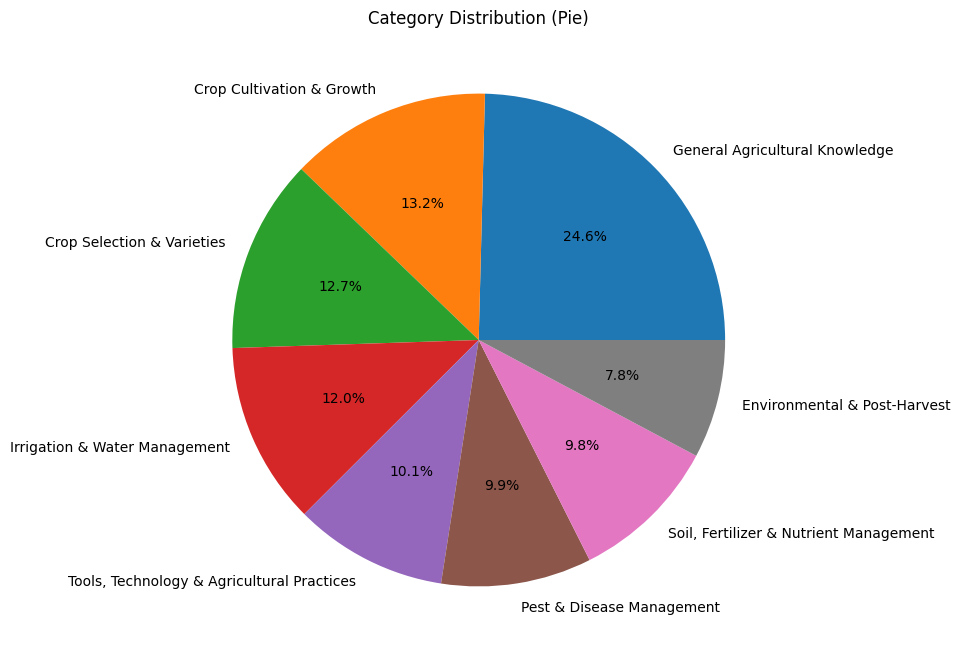

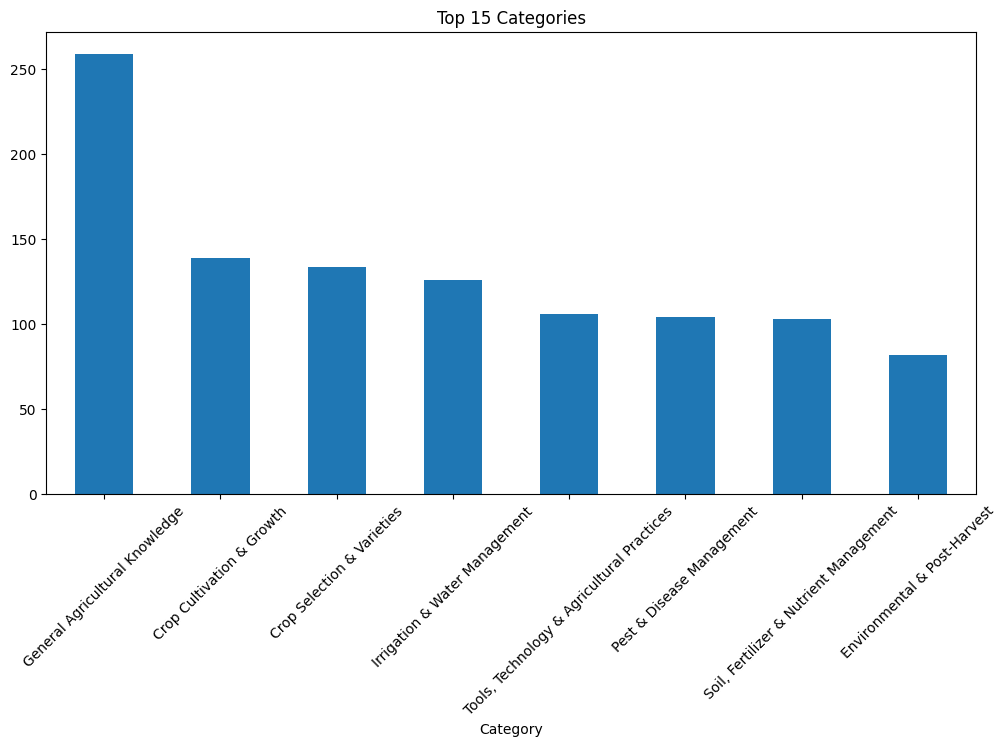


📊 Additional Dataset Statistics
--------------------------------
Total samples: 1053
Number of categories: 8

Text Length (tokens):
- Min length: 3
- Max length: 88
- Average length: 17.58
- Median length:  16.00


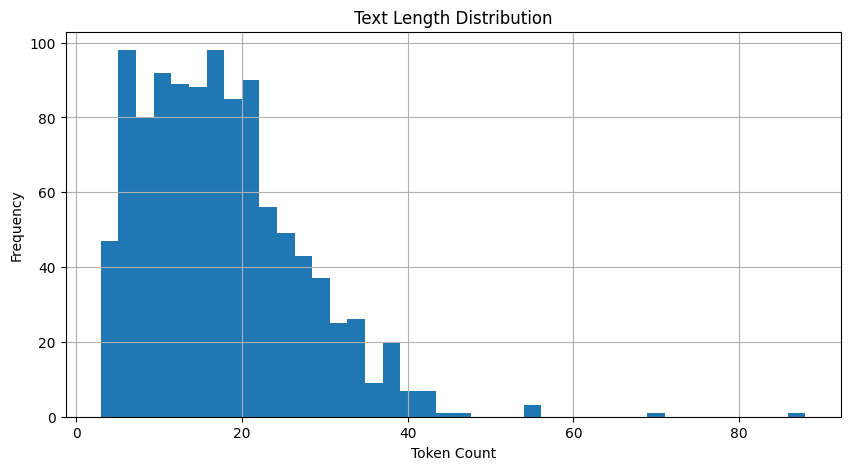


🔝 Top 20 most common tokens:
အပင်: 221
ဖော်ပြပါ။: 147
ပါတယ်။: 134
နိုင်သည်။: 101
ဖြစ်သည်။: 99
ရှင်းပြပါ။: 85
ဖြစ်ပါတယ်။: 84
ဖော်ပြပါ: 83
သည်။: 72
မြန်မာနိုင်ငံ၏: 63
သစ်ပင်: 61
မြန်မာနိုင်ငံတွင်: 59
သို့မဟုတ်: 57
အသုံးပြု: 56
အာဟာ: 53
စိုက်ပျိုး: 52
၁။: 48
၃။: 48
၄။: 48
သည်: 47

🔑 Keywords per Category:
- General Agricultural Knowledge: ['မြန်မာနိုင်ငံ၏', 'မြန်မာနိုင်ငံတွင်', 'စိုက်ပျိုး', 'သည့်အချိန်တွင်', 'နေသည်။', 'အပင်', 'စပျစ်စိုက်ပျိုးရေး', 'ဆိုတာ', 'သို့သော်', 'စတင်ခဲ့စဉ်က']
- Soil, Fertilizer & Nutrient Management: ['သဘာဝမြေဩဇာများကို', 'အပင်', 'မြေဆီလွှာ၏', 'ဖြစ်သည်။', 'အာဟာ', 'အော်ဂဲနစ်စိုက်ပျိုးရေးတွင်', 'ခြင်း၊', 'အသုံးပြုခြင်း။', 'ဖော်ပြပါ', 'သဘာဝမြေဩဇာများ']
- Irrigation & Water Management: ['အင်္ဂလိပ်လို', 'ဘယ်လိုခေါ်ပါသလဲ။', 'အသုံးပြုသော', 'စပါးစိုက်ပျိုးရေးတွင်', 'အပူလွန်ကဲသော', 'ပါတယ်။', 'တည်ဆောက်ခြင်း', 'ထွန်စက်ကို', 'silent spring', 'စိုက်ပျိုးခြင်း၊']
- Crop Cultivation & Growth: ['သစ်ပင်', 'အပင်', 'စိုက်ပျိုးရာတွင်', 'ဘာလဲ', 'ဆိုတာ', 'ရှင်းပြပါ', 'ပါသည်။', 'ဘာကြော

In [9]:
import json
from pathlib import Path
import os

import matplotlib.pyplot as plt
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from mmdt_tokenizer import MyanmarTokenizer
from collections import Counter
import numpy as np

tokenizer = MyanmarTokenizer()

BASE_DIR = Path().resolve().parent
DATA_PATH = BASE_DIR / "data" / "Agriculture_cleaned.csv"

OUTPUT_DIR = BASE_DIR / "eda"
PIE_PATH = OUTPUT_DIR / "category_pie.png"
BAR_PATH = OUTPUT_DIR / "category_bar.png"
KEYWORDS_PATH = OUTPUT_DIR / "category_keywords.json"


# -------------------------------------------------------
# Tokenizer wrapper
# -------------------------------------------------------
def burmese_tokenizer(text: str) -> list:
    if not isinstance(text, str):
        text = "" if pd.isna(text) else str(text)

    tokens = tokenizer.word_tokenize(text)

    # unwrap nested list from mmdt-tokenizer
    if tokens and isinstance(tokens[0], list):
        tokens = tokens[0]

    return [tok.strip().lower() for tok in tokens if isinstance(tok, str) and tok.strip()]


def clean_and_join(text: str) -> str:
    return " ".join(burmese_tokenizer(text))


# -------------------------------------------------------
# Load dataset
# -------------------------------------------------------
def load_dataset() -> pd.DataFrame:
    if not DATA_PATH.exists():
        raise FileNotFoundError(f"Dataset not found: {DATA_PATH}")

    df = pd.read_csv(DATA_PATH)
    df["Category"] = df["Category"].str.strip()
    df["Category"] = df["Category"].str.replace(r"^\.+", "", regex=True)
    df["Category"] = df["Category"].str.replace(r"\s+", " ", regex=True)

    df = df.rename(columns=str.strip)

    if "Unnamed: 0" in df.columns:
        df = df.drop(columns=["Unnamed: 0"])

    for col in ("Instruction", "Output", "Category"):
        if col not in df.columns:
            raise ValueError(f"Missing column: {col}")

    df["Instruction"] = df["Instruction"].fillna("").astype(str)
    df["Output"] = df["Output"].fillna("").astype(str)
    df["Category"] = df["Category"].fillna("Unknown").astype(str)

    df["combined_text"] = (df["Instruction"] + " " + df["Output"]).map(clean_and_join)
    df["text_length"] = df["combined_text"].apply(lambda x: len(x.split()))

    return df


# -------------------------------------------------------
# Visualizations (also displayed in notebook)
# -------------------------------------------------------
def plot_category_pie(df):
    distribution = df["Category"].value_counts()
    fig, ax = plt.subplots(figsize=(10, 8))
    ax.pie(distribution.values, labels=distribution.index, autopct='%1.1f%%')
    plt.title("Category Distribution (Pie)")
    plt.show()               # Show inside notebook
    fig.savefig(PIE_PATH)    # Also save
    plt.close(fig)


def plot_category_bar(df, top_n=15):
    distribution = df["Category"].value_counts().head(top_n)
    fig, ax = plt.subplots(figsize=(12, 6))
    distribution.plot(kind='bar', ax=ax)
    plt.title(f"Top {top_n} Categories")
    plt.xticks(rotation=45)
    plt.show()
    fig.savefig(BAR_PATH)
    plt.close(fig)


# -------------------------------------------------------
# Extract keywords per category
# -------------------------------------------------------
def extract_keywords(df, top_n=10):
    vectorizer = TfidfVectorizer(
        tokenizer=burmese_tokenizer,
        preprocessor=lambda x: x,
        token_pattern=None,
        lowercase=False,
        max_features=5000,
    )

    tfidf_matrix = vectorizer.fit_transform(df["combined_text"])
    feature_names = vectorizer.get_feature_names_out()

    keyword_map = {}

    for category in df["Category"].unique():
        mask = (df["Category"] == category).to_numpy()
        if mask.sum() == 0:
            continue

        category_matrix = tfidf_matrix[mask]
        mean_scores = category_matrix.mean(axis=0).A1
        top_indices = mean_scores.argsort()[::-1][:top_n]

        keyword_map[category] = [feature_names[i] for i in top_indices]

    return keyword_map


# -------------------------------------------------------
# Additional EDA Stats
# -------------------------------------------------------
def print_more_stats(df):
    lengths = df["text_length"]

    print("\n📊 Additional Dataset Statistics")
    print("--------------------------------")
    print(f"Total samples: {len(df)}")
    print(f"Number of categories: {df['Category'].nunique()}")

    print(f"\nText Length (tokens):")
    print(f"- Min length: {lengths.min()}")
    print(f"- Max length: {lengths.max()}")
    print(f"- Average length: {lengths.mean():.2f}")
    print(f"- Median length:  {lengths.median():.2f}")

    # Histogram of text lengths
    plt.figure(figsize=(10, 5))
    lengths.hist(bins=40)
    plt.title("Text Length Distribution")
    plt.xlabel("Token Count")
    plt.ylabel("Frequency")
    plt.show()

    # Most common tokens (entire dataset)
    all_tokens = []
    df["combined_text"].str.split().apply(all_tokens.extend)

    top_tokens = Counter(all_tokens).most_common(20)
    print("\n🔝 Top 20 most common tokens:")
    for tok, cnt in top_tokens:
        print(f"{tok}: {cnt}")


# -------------------------------------------------------
# Save keywords JSON
# -------------------------------------------------------
def save_keywords(keywords):
    KEYWORDS_PATH.write_text(json.dumps(keywords, ensure_ascii=False, indent=2), encoding="utf-8")


# -------------------------------------------------------
# RUN EDA (Updated)
# -------------------------------------------------------
def run_eda():
    OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

    df = load_dataset()

    print("\n🔍 Dataset Loaded:")
    print(df.head())

    # Show EDA visuals
    plot_category_pie(df)
    plot_category_bar(df)

    # More EDA stats
    print_more_stats(df)

    # Extract keywords
    keywords = extract_keywords(df)
    print("\n🔑 Keywords per Category:")
    for cat, keys in keywords.items():
        print(f"- {cat}: {keys}")

    save_keywords(keywords)

    print("\n📁 Files saved to:", OUTPUT_DIR)


# -------------------------------------------------------
# EXECUTE
# -------------------------------------------------------
run_eda()


In [7]:
import pandas as pd
df = pd.read_csv("../data/Agriculture.csv")
counts = df["Category"].value_counts()

print(counts)

Category
General Agricultural Knowledge                 259
Crop Cultivation & Growth                      139
Crop Selection & Varieties                     134
Irrigation & Water Management                  126
Tools, Technology & Agricultural Practices     106
Pest & Disease Management                      104
Soil, Fertilizer & Nutrient Management         103
Climate & Weather Impact                        66
Harvesting, Storage & Post-Harvest Handling     16
Name: count, dtype: int64


In [8]:
import pandas as pd

INPUT_PATH = "../data/Agriculture.csv"
OUTPUT_PATH = "../data/Agriculture_cleaned.csv"

# Load
df = pd.read_csv(INPUT_PATH)
df = df.rename(columns=str.strip)

# Normalize Category column
df["Category"] = df["Category"].str.strip()
df["Category"] = df["Category"].str.replace(r"\s+", " ", regex=True)

# Categories to merge
to_merge = [
    "Climate & Weather Impact",
    "Harvesting, Storage & Post-Harvest Handling",
]

new_category_name = "Environmental & Post-Harvest"

# Replace old categories with new one
df["Category"] = df["Category"].replace(to_merge, new_category_name)

# Save cleaned file
df.to_csv(OUTPUT_PATH, index=False, encoding="utf-8-sig")

print("Saved cleaned file to:", OUTPUT_PATH)
print(df["Category"].value_counts())


Saved cleaned file to: ../data/Agriculture_cleaned.csv
Category
General Agricultural Knowledge                259
Crop Cultivation & Growth                     139
Crop Selection & Varieties                    134
Irrigation & Water Management                 126
Tools, Technology & Agricultural Practices    106
Pest & Disease Management                     104
Soil, Fertilizer & Nutrient Management        103
Environmental & Post-Harvest                   82
Name: count, dtype: int64
